In [1]:
import tqdm
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)

import ulsif

In [2]:
tmis = [-0.5 * np.log(1 - c**2) for c in np.arange(0, 0.5, 0.1)]

In [3]:
n = 3000
mis = []

for c in tqdm.tqdm(np.arange(0, 0.5, 0.1)):
    cov = np.array([[1, c], [c, 1]])
    XY = scipy.stats.multivariate_normal(mean=[0, 0], cov=cov).rvs(n)
    X, Y = np.split(XY, [1], axis=1)
    mis += [ulsif.MutualInformation(sigma=0.5, lamb=0.01).fit(X, Y).mi]

100%|██████████| 5/5 [23:08<00:00, 278.48s/it]


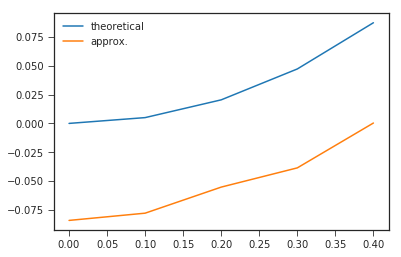

In [4]:
plt.plot(np.arange(0, 0.5, 0.1), tmis, label='theoretical')
plt.plot(np.arange(0, 0.5, 0.1), mis, label='approx.')
plt.legend()